# Import Libraries

In [170]:
import pandas as pd
import numpy as np

import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import style

from sklearn.ensemble import RandomForestClassifier

# Get Dataset

In [171]:
test = pd.read_csv("test.csv")
train = pd.read_csv("train.csv")

# Explore Datasets

In [172]:
train.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [173]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [174]:
# about missing datasets
total = train.isnull().sum().sort_values(ascending=False)
ratio = (train.isnull().sum()/train.isnull().count()*100).sort_values(ascending=False)

missing_data = pd.concat([total,ratio],axis=1,keys=['Total','Ratio'])
missing_data.head(3)

,Total,Ratio
Cabin,687,77.104377
Age,177,19.865320
Embarked,2,0.224467


# Age & Sex

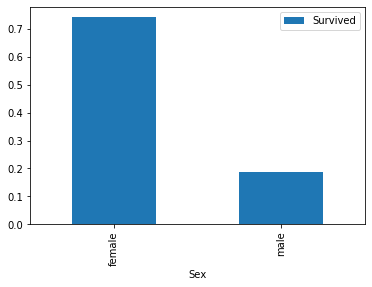

In [175]:
sex_pivot = train.pivot_table(index='Sex',values='Survived')
sex_pivot.plot.bar()
plt.show()

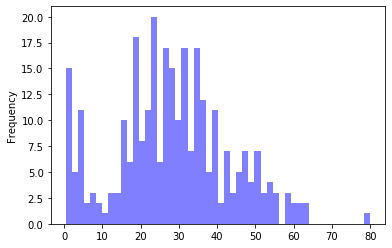

In [176]:
# total survivors according to age
survived = train[train['Survived']==1]
survived['Age'].plot.hist(alpha=0.5,color='blue',bins=50)
plt.show()

# Pclass & Sex

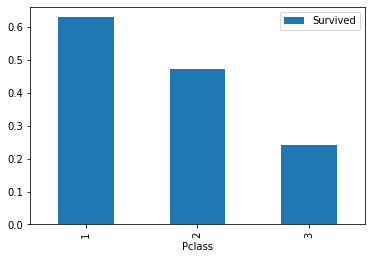

In [177]:
pclass_pivot = train.pivot_table(index='Pclass',values='Survived')
pclass_pivot.plot.bar()
plt.show()

In [178]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

# Data Preprocessing

In [179]:
train_tmp = train.drop(['PassengerId'],axis=1)
test_tmp = test.drop(['PassengerId'],axis=1)
# missing data

# cabin
train_tmp = train_tmp.drop(['Cabin'],axis=1)
test_tmp = test_tmp.drop(['Cabin'],axis=1)

# Age
mean = train_tmp['Age'].mean()
std = train_tmp['Age'].std()
is_null_cnt = train_tmp['Age'].isnull().sum()
rand_age = np.random.randint(mean-std,mean+std,size=is_null_cnt)

rand_tmp = train_tmp['Age'].copy()
rand_tmp[np.isnan(rand_tmp)] = rand_age
train_tmp['Age'] = rand_tmp

mean = test_tmp['Age'].mean()
std = test_tmp['Age'].std()
is_null_cnt = test_tmp['Age'].isnull().sum()
rand_age = np.random.randint(mean-std,mean+std,size=is_null_cnt)

rand_tmp = test_tmp['Age'].copy()
rand_tmp[np.isnan(rand_tmp)] = rand_age
test_tmp['Age'] = rand_tmp


#Embarked
common_v = 'S'
train_tmp['Embarked'] = train_tmp['Embarked'].fillna(common_v)

common_v = 'S'
test_tmp['Embarked'] = test_tmp['Embarked'].fillna(common_v)

#check dataset
test_tmp.info()




<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    int64  
 1   Name      418 non-null    object 
 2   Sex       418 non-null    object 
 3   Age       418 non-null    float64
 4   SibSp     418 non-null    int64  
 5   Parch     418 non-null    int64  
 6   Ticket    418 non-null    object 
 7   Fare      417 non-null    float64
 8   Embarked  418 non-null    object 
dtypes: float64(2), int64(3), object(4)
memory usage: 29.5+ KB


# Converting exisiting data 

In [180]:
# Fare
train_tmp['Fare'] = train_tmp['Fare'].fillna(0).astype(int)
test_tmp['Fare'] = test_tmp['Fare'].fillna(0).astype(int)

# Name convert into title
title = {"Mr" : 1, "Miss" : 2, "Mrs" : 3, "Master" : 4, "Others" : 5}
train_tmp['Title'] = train_tmp.Name.str.extract(' ([A-Za-z]+)\.',expand=False)
train_tmp['Title'] = train_tmp['Title'].replace(['Lady','Countess','Capt','Col','Don',
                                                'Dr','Major','Rev','Sir','Jonkheer'],'Others')
train_tmp['Title'] = train_tmp['Title'].replace('Mlle','Miss')
train_tmp['Title'] = train_tmp['Title'].replace('Ms','Miss')
train_tmp['Title'] = train_tmp['Title'].replace('Mme','Mrs')

title = {"Mr" : 1, "Miss" : 2, "Mrs" : 3, "Master" : 4, "Others" : 5}
test_tmp['Title'] = test_tmp.Name.str.extract(' ([A-Za-z]+)\.',expand=False)
test_tmp['Title'] = test_tmp['Title'].replace(['Col','Dona',
                                                'Dr','Rev'],'Others')
test_tmp['Title'] = test_tmp['Title'].replace('Ms','Miss')


# convert title into numbers
train_tmp['Title'] = train_tmp['Title'].map(title)
test_tmp['Title'] = test_tmp['Title'].map(title)

# filling NaN with 0, to get safe
train_tmp['Title'] = train_tmp['Title'].fillna(0)
train_tmp = train_tmp.drop(['Name'],axis=1)

test_tmp['Title'] = test_tmp['Title'].fillna(0)
test_tmp = test_tmp.drop(['Name'],axis=1)

# Sex
gender = {"male":0, "female":1}
train_tmp['Sex'] = train_tmp["Sex"].map(gender)
test_tmp['Sex'] = test_tmp["Sex"].map(gender)

# Ticket drop
train_tmp = train_tmp.drop(["Ticket"],axis=1)
test_tmp = test_tmp.drop(["Ticket"],axis=1)

# Embarked
ports = {"S" : 0, "C" : 1, "Q" : 2}
train_tmp["Embarked"] = train_tmp["Embarked"].map(ports)
test_tmp["Embarked"] = test_tmp["Embarked"].map(ports)

# Map Categories to finite sets

In [181]:
# Age
train_tmp['Age'] = train_tmp['Age'].astype(int)

train_tmp.loc[train_tmp['Age']<=11,'Age'] = 0
train_tmp.loc[(train_tmp['Age']>11)&(train_tmp['Age']<=18),'Age'] = 1
train_tmp.loc[(train_tmp['Age']>18)&(train_tmp['Age']<=22),'Age'] = 2
train_tmp.loc[(train_tmp['Age']>22)&(train_tmp['Age']<=27),'Age'] = 3
train_tmp.loc[(train_tmp['Age']>27)&(train_tmp['Age']<=33),'Age'] = 4
train_tmp.loc[(train_tmp['Age']>33)&(train_tmp['Age']<=40),'Age'] = 5
train_tmp.loc[train_tmp['Age']>40,'Age'] = 6

train_tmp['Age'].value_counts()

test_tmp['Age'] = test_tmp['Age'].astype(int)

test_tmp.loc[test_tmp['Age']<=11,'Age'] = 0
test_tmp.loc[(test_tmp['Age']>11)&(test_tmp['Age']<=18),'Age'] = 1
test_tmp.loc[(test_tmp['Age']>18)&(test_tmp['Age']<=22),'Age'] = 2
test_tmp.loc[(test_tmp['Age']>22)&(test_tmp['Age']<=27),'Age'] = 3
test_tmp.loc[(test_tmp['Age']>27)&(test_tmp['Age']<=33),'Age'] = 4
test_tmp.loc[(test_tmp['Age']>33)&(test_tmp['Age']<=40),'Age'] = 5
test_tmp.loc[test_tmp['Age']>40,'Age'] = 6

test_tmp['Age'].value_counts()

6    87
3    81
4    69
2    60
5    53
1    45
0    23
Name: Age, dtype: int64

In [182]:
# Fare
train_tmp.loc[train_tmp['Fare']<=7.91,'Fare'] = 0
train_tmp.loc[(train_tmp['Fare']>7.91)&(train_tmp['Fare']<=14.451),'Fare'] = 1
train_tmp.loc[(train_tmp['Fare']>14.451)&(train_tmp['Fare']<=31),'Fare'] = 2
train_tmp.loc[(train_tmp['Fare']>31)&(train_tmp['Fare']<99),'Fare'] = 3
train_tmp.loc[(train_tmp['Fare']>99)&(train_tmp['Fare']<=250),'Fare'] = 4
train_tmp.loc[train_tmp['Fare']>250,'Fare'] = 5

train_tmp['Fare'].value_counts()

test_tmp.loc[test_tmp['Fare']<=7.91,'Fare'] = 0
test_tmp.loc[(test_tmp['Fare']>7.91)&(test_tmp['Fare']<=14.451),'Fare'] = 1
test_tmp.loc[(test_tmp['Fare']>14.451)&(test_tmp['Fare']<=31),'Fare'] = 2
test_tmp.loc[(test_tmp['Fare']>31)&(test_tmp['Fare']<99),'Fare'] = 3
test_tmp.loc[(test_tmp['Fare']>99)&(test_tmp['Fare']<=250),'Fare'] = 4
test_tmp.loc[test_tmp['Fare']>250,'Fare'] = 5

test_tmp['Fare'].value_counts()

0    120
2    102
1     96
3     69
4     23
5      8
Name: Fare, dtype: int64

# Create new Features

In [183]:
# Age times Class
train_tmp['Age_Class'] = train_tmp['Age'] * train_tmp['Pclass']

test_tmp['Age_Class'] = test_tmp['Age'] * test_tmp['Pclass']

# Building Machine Learning Models

In [184]:
train_X = train_tmp.drop('Survived',axis=1)
train_Y = train_tmp['Survived']
train_X.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,Age_Class
0,3,0,2,1,0,0,0,1,6
1,1,1,5,1,0,3,1,3,5
2,3,1,3,0,0,0,0,2,9
3,1,1,5,1,0,3,0,3,5
4,3,0,5,0,0,1,0,1,15


In [185]:
test_tmp

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,Age_Class
0,3,0,5,0,0,0,2,1,15
1,3,1,6,1,0,0,0,3,18
2,2,0,6,0,0,1,2,1,12
3,3,0,3,0,0,1,0,1,9
4,3,1,2,1,1,1,0,3,6
...,...,...,...,...,...,...,...,...,...
413,3,0,5,0,0,1,0,1,15
414,1,1,5,0,0,4,1,5,5
415,3,0,5,0,0,0,0,1,15
416,3,0,6,0,0,1,0,1,18


In [186]:
# Radnom Forest
clf = RandomForestClassifier(n_estimators=100)
clf.fit(train_X,train_Y)
print("Score: ",round(clf.score(train_X,train_Y)*100,2))

Score:  91.13


In [189]:
test_d = test.drop("PassengerId",axis=1)
pred = clf.predict(test_tmp)

In [191]:
submission = pd.DataFrame({
    "PassengerId":test["PassengerId"],
    "Survived":pred
})
submission.to_csv("wow.csv",index=False)